# Movie Revenue Prediction with Linear Regression
Target: Revenue<br>
Feature: Budget<br>

## Problem Solving Procedure:
- Formulate Question
- Gather Data
- Clean Data
- Explore & Visualize Data
- Train Algorithm
- Evaluate

## 1. Gather and Clean Data
Movie Budget and Gross data is provided by [The Numbers](https://www.the-numbers.com/movie/budgets/all)<br>
the unfiltered dirty data is provided as `cost_revenue_dity.csv` in this folder. However, you are required to delete the disputed figures manually(deleting 0$ worldwide Gross rows, Domestic Gross column, Rank column, Release Data column, Movie Title column, '$' sign, and rename `Production_Budget_USD` and `Worldwide_Gross_USD`).

In [1]:
# If you don't have pandas install, please execute 'pip install pandas' in CMD to install the package
import pandas as pd
from pandas import DataFrame
# If you don't have matplotlib install, please execute 'python -m pip install -U matplotlib' in CMD to install the package
import matplotlib.pyplot as plt
# install with command 'pip install scikit-learn'
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:

data = pd.read_csv('cost_revenue_cleaned.csv')

# DataFrame is a collection of 'Series'(Series is a data type)
# Series is a single dimension, but array could be 2D matrix; Series also has attributes such as titles or names,but array or list doesn't have
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,Production_Budget_USD,Worldwide_Gross_USD
0,1000000.0,2.600000e+01
1,10000.0,4.010000e+02
2,400000.0,4.230000e+02
3,750000.0,4.500000e+02
4,10000.0,5.270000e+02
...,...,...
5029,225000000.0,1.519480e+09
5030,215000000.0,1.671641e+09
5031,306000000.0,2.058662e+09
5032,200000000.0,2.207616e+09


In [3]:
data.describe()

,Production_Budget_USD,Worldwide_Gross_USD
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [4]:
# This is creating a one dimension Series
X_Value = data['Production_Budget_USD']
print(type(X_Value))

# This creates a 2D DataFrame
# NOTE: we need to use 2D DataFrame for fitting the linear model
X_Value = data[['Production_Budget_USD']]
print(type(X_Value))
# You could also use provided DataFrame function to generate X_Value
# X = DataFrame(data, columns=['Production_Budget_USD'])

Y_Value = data[['Worldwide_Gross_USD']]
# Y = DataFrame(data, columns=['Worldwide_Gross_USD'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


## 2. Explore and Visulize Data

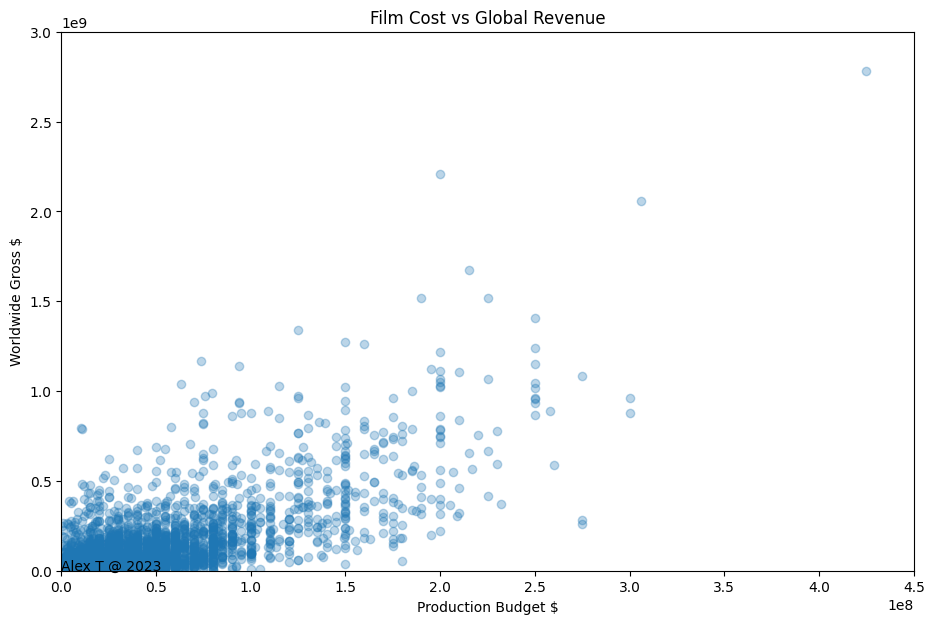

In [5]:
plt.figure(figsize=(11,7))# change the figure size to 10 x 6
plt.text(x=0, y=0, s='Alex T @ 2023')
plt.scatter(X_Value,Y_Value, alpha=0.3)#given a alpha value
# Given titles to the chart
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
# Changing 
plt.xlim(0,450000000)
plt.ylim(0,3000000000)
plt.style.use('ggplot')
plt.show()

## 3. Training Algorithm

In [6]:
regression = LinearRegression()
# DataFrame(2D) is the required input for fitting linear model
regression.fit(X_Value,Y_Value)

LinearRegression()

Slope Coefficient

In [7]:
print(type(regression.coef_))
print('Theta1(Slope) is: ', regression.coef_[0][0]) #theta_1

<class 'numpy.ndarray'>
Theta1(Slope) is:  3.111509182936128


Intercept

In [8]:
print(type(regression.intercept_))
print('Intercept is: ',regression.intercept_[0]) #intercept

<class 'numpy.ndarray'>
Intercept is:  -7236192.729139626


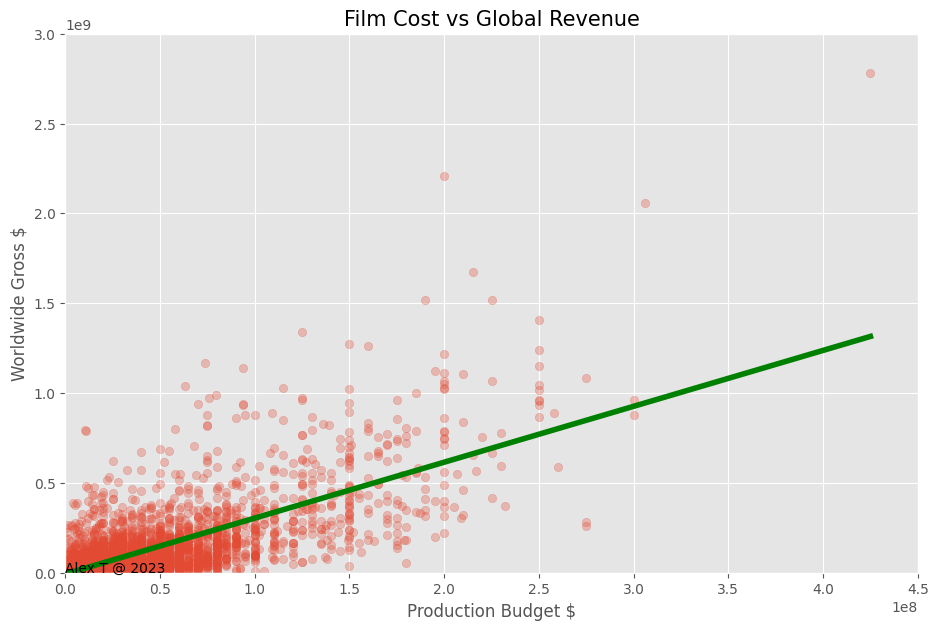

In [9]:
plt.figure(figsize=(11,7))# change the figure size to 10 x 6
plt.scatter(X_Value,Y_Value, alpha=0.3)# given a alpha value

plt.text(x=0, y=0, s='Alex T @ 2023')
plt.plot(X_Value, regression.predict(X_Value), color = 'green', linewidth = 4)

# Given titles to the chart
plt.title('Film Cost vs Global Revenue',fontsize = 15)
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
# Changing 
plt.xlim(0,450000000)
plt.ylim(0,3000000000)
plt.style.use('ggplot')
plt.show()

In [10]:
# Goodness of Fit
print('Goodness of Fit: ', regression.score(X_Value,Y_Value))
# Over 50% of data fit the linear model, and this is considering as an acceptable model

Goodness of Fit:  0.5496485356985727
